In [ ]:
import re

In [ ]:
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS
import spacy
nlp = spacy.load('en_core_web_lg')
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS 

In [ ]:
ev_txt = open('ev_txt.txt', mode = 'r')
var_list = []
for ix,line in enumerate(ev_txt):
    #var_list.append(line.replace('\n','').lower().split())
    entities = nlp(line).ents
    if len(entities) == 0:
        var_list.append(line.replace('\n','').lower().split())
    else:
        PersPlc = False
        for ent in entities:
            
            if ent.label_ not in ['ORG','MONEY','LAW','EVENT','QUANTITY']:
                PersPlc == True
                break
                
            if PersPlc == False:
                var_list.append(line.replace('\n','').lower().split())
                
        
    if ix%10000 == 0:
        print(ix)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000


In [ ]:
print(var_list[0:100])

[['consumer', 'price', 'index'], ['all', 'urban', 'consumers'], ['all', 'items'], ['unemployment', 'rate'], ['federal', 'funds', 'effective', 'rate'], ['gross', 'domestic', 'product'], ['real', 'gross', 'domestic', 'product'], ['market', 'yield'], ['u.s.', 'treasury', 'securities'], ['ice', 'bofa'], ['us'], ['high', 'yield', 'index', 'option-adjusted', 'spread'], ['m2'], ['assets'], ['total', 'assets'], ['total', 'assets'], ['less', 'eliminations'], ['consolidation'], ['u.s.', 'treasury', 'securities'], ['velocity'], ['m2', 'money', 'stock'], ['median', 'sales', 'price'], ['houses'], ['m2'], ['treasury', 'securities'], ['the', 'federal', 'reserve'], ['the', 'temporary', 'open', 'market', 'operations'], ['federal', 'debt'], ['total', 'public', 'debt'], ['percent'], ['gross', 'domestic', 'product'], ['libor'], ['labor', 'force', 'participation', 'rate'], ['s&p'], ['inflation'], ['consumer', 'prices'], ['crude', 'oil', 'prices'], ['cushing'], ['real', 'median', 'household', 'income'], ['s

In [ ]:
EV_list = []
EV_count = {}
phrase_model = Phrases(var_list, min_count=1, threshold=1, connector_words=ENGLISH_CONNECTOR_WORDS)
phrase_model = phrase_model.freeze()


In [ ]:
econ_vocab = {}

for ix,sentence in enumerate(var_list):
    #print(sentence)
    if len(sentence)==1 and sentence[0] not in spacy_stopwords and len(sentence[0])>2:
        word = re.sub('[\(\)]','',sentence[0])
        if  nlp(word)[0].pos_ not in ['PNOUN','X']:
            if word not in econ_vocab:
                econ_vocab[word] =1
            else:
                econ_vocab[word] +=1
        
    for phrase in phrase_model[sentence]:
        #print(phrase)
        if phrase.__contains__('_'):
            term =phrase.replace('_',' ').replace('u.s.', 'united states')
            if term not in econ_vocab:
                econ_vocab[term] =1
            else:
                econ_vocab[term] +=1
    if ix%10000 == 0:
        print(ix/len(var_list))

0.0
0.0401474213311279
0.0802948426622558
0.1204422639933837
0.1605896853245116
0.2007371066556395
0.2408845279867674
0.2810319493178953
0.3211793706490232
0.3613267919801511
0.401474213311279
0.4416216346424069
0.4817690559735348
0.5219164773046627
0.5620638986357906
0.6022113199669186
0.6423587412980464
0.6825061626291743
0.7226535839603022
0.7628010052914301
0.802948426622558
0.843095847953686
0.8832432692848138
0.9233906906159417
0.9635381119470696


In [ ]:
compound_vocab = {}
single_vocab = {}
rejected=[]
THRESHOLD = 2
for phrase, count in econ_vocab.items():
    if count > THRESHOLD:
        if len(phrase.split()) == 1:
            single_vocab[phrase] = count
        else:
            compound_vocab[phrase] = count
    else:
        rejected.append(phrase)

In [ ]:
len(compound_vocab)
len(econ_vocab)

8443

In [ ]:
print('----------------------------------\n*************REJECTED*************')
print(rejected[0:200])
print('------w----------------------------\n*************ACCEPTED*************')
print(list(compound_vocab.keys())[0:100])
print(list(single_vocab.keys())[0:100])

----------------------------------
*************REJECTED*************
['s&p', 'cushing', 'ted', 'gold fixing', 'vix', 'range -', 'potential gross', 'bank prime', 'bond yields', 'benchmark', 'e-commerce retail', 'weight trucks', 'henry hub', 'cass freight', 'styrene-butadiene rubber', 'sbr', 'ethylene propylene', 'retailers', 'dates', 'net outlays', 'sahm rule', 'factor productivity', 'housing affordability', 'titanium-base', 'broad effective', 'short-term', 'yellow brass', '-a us', 'dow-jones industrial', 'hourly wage', 'cboe s&p', 'market economies', 'carbon black', 'truck tonnage', 'cboe gold', '211111pt', 'other phosphate', 'indicator', 'fixing price', 'pillows/seating', 'bauxite', 'rail freight', 'u-4', 'seattle-bellevue-kent', '100 volatility', 'disbursements', 'broad dollar', 'corrugated recyclable', 'plastics water', 'medium density', 'fertility rate', 'kerosene-type jet', 'heat sinks', 'unlaminated polyethylene', 'trash collection', 'maple', 'crushed stone', 'pallet containers'

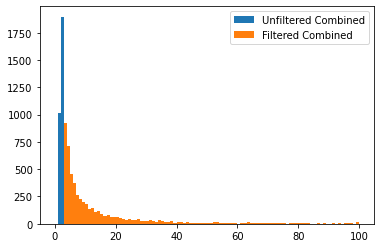

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

np_count = np.sort(np.array(list(econ_vocab.values())))
plt.hist(np_count, bins=100, range=(0,100), label = 'Unfiltered Combined')#,log=True)

np_count_edit = np.sort(np.array(list(compound_vocab.values())+list(single_vocab.values())))
np_count_compound = np.sort(np.array(list(compound_vocab.values())))
np_count_single = np.sort(np.array(list(single_vocab.values())))
#plt.hist(np_count_compound, bins=100, range=(0,100),label = 'Passed Compound Words',log=True)
#plt.hist(np_count_single, bins=100, range=(0,100), label = 'Passed Single Words',log=True)
plt.hist(np_count_edit, bins=100, range=(0,100), label = 'Filtered Combined')#log=True)
plt.legend()
plt.show()


In [ ]:
single_set = set(single_vocab.keys())
compound_set = set(compound_vocab.keys())
len(compound_set), len(single_set), len(econ_vocab)

(3963, 1568, 8443)

In [ ]:
count = {}
for words in compound_set:
    for word in words.split():
        if len(word)>2 and word not in spacy_stopwords:
            if word not in count:
                count[word] =1
            else:
                count[word] +=1

(array([0.000e+00, 2.193e+03, 4.450e+02, 2.110e+02, 1.220e+02, 8.300e+01,
        4.800e+01, 4.200e+01, 2.600e+01, 2.300e+01, 2.100e+01, 1.400e+01,
        1.200e+01, 8.000e+00, 9.000e+00, 4.000e+00, 5.000e+00, 4.000e+00,
        4.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 4.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30.]),
 <BarContainer object of 30 artists>)

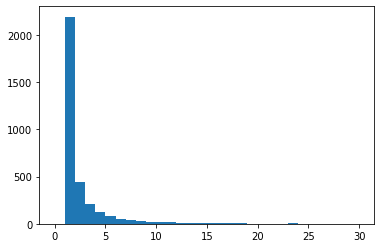

In [ ]:
np_count = np.sort(np.array(list(count.values())))
plt.hist(np_count, bins=30, range=(0,30), label = 'Single Words')

In [ ]:
for word, wc in count.items():
    if wc > 3:
       single_set.add(word)
    
    
    

In [ ]:
FRSF = open('FRSF.txt', mode='r')
texts = FRSF.read().replace('U.S.', 'United States').replace('U.K.', 'United Kingdom').lower()
sents_doc = [nlp(text) for text in texts[0:1000000].replace('\n','').split('.')]
total_doc = nlp(text[0:1000000])
length_doc = len(sents_doc)
print('DONE PROCESSING DOCS WITH SPACY')


DONE PROCESSING DOCS WITH SPACY


In [ ]:
total_doc = nlp(texts[0:1000000])

In [1]:
text_list = texts.lower().split('.')
for ix,sentence in enumerate(text_list[0:1000]):
    print('--')
    print(sentence)
    for nc in nlp(sentence).noun_chunks:
        print('nc:',nc)
        print(phrase_model[nc.text.split()])
        for phrase in phrase_model[nc.text.split()]:
            if phrase.__contains__('_')==False and phrase in single_set:
                print(phrase)

NameError: ignored

In [ ]:
labels[0]

['O',
 'O',
 'O',
 'O',
 'O',
 'E',
 'E',
 'E',
 'E',
 'E',
 'E',
 'E',
 'O',
 'E',
 'E',
 'E',
 'E',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O']

In [2]:
from tqdm import tqdm

tokens = [list(sent.text.split()) for sent in sents_doc]
labels = [['O'] * len(sent) for sent in sents_doc]


EVents = [];
for six, sent in enumerate(sents_doc):
    for nc in sent.noun_chunks:
        #print(nc.text)
        evinc = False
        split = nc.text.split()
        start = nc.start
        end = nc.end
        #print(start)
        #print(end)
        for word in split:

            if word in single_set and word not in spacy_stopwords:
                if nc.start>10:
                    EVents.append(nc)
                    evinc = True
                    break

            elif len(split) > 1:
                for output in phrase_model[split]:
                    if output.__contains__('_'):
                        EVents.append(nc)
                        evinc = True
                        break
                if evinc == True:
                    break
        if evinc == True:
            for i in range(start,end):
                labels[six][i] = 'E'
                    

NameError: ignored

In [3]:
for token,label in zip(tokens,labels):
    print(token, label)


NameError: ignored

In [ ]:

window_size=40
D = []; ents_list = []
for i in tqdm(range(len(EVents))):
    e1 = EVents[i]
    e1start = e1.start; e1end = e1.end
    #if e1.label_ not in entities_of_interest:
    #    continue
    if re.search("[\d+]", e1.text): # entities should not contain numbers
        continue

    for j in range(1, len(EVents) - i):
        e2 = EVents[i + j]
        e2start = e2.start; e2end = e2.end
        #if e2.label_ not in entities_of_interest:
        #    continue
        if re.search("[\d+]", e2.text): # entities should not contain numbers
            continue
        if e1.text.lower() == e2.text.lower(): # make sure e1 != e2
            continue

        if (1 <= (e2start - e1end) <= window_size): # check if next nearest entity within window_size
            # Find start of sentence
            punc_token = False
            start = e1start - 1
            if start > 0:
                while not punc_token:
                    punc_token = total_doc[start].is_punct
                    start -= 1
                    if start < 0:
                        break
                left_r = start + 2 if start > 0 else 0
            else:
                left_r = 0

            # Find end of sentence
            punc_token = False
            start = e2end
            if start < length_doc:
                while not punc_token:
                    punc_token = total_doc[start].is_punct
                    start += 1
                    if start == length_doc:
                        break
                right_r = start if start < length_doc else length_doc
            else:
                right_r = length_doc

            if (right_r - left_r) > window_size: # sentence should not be longer than window_size
                continue

            x = [token.text for token in sents_doc[left_r:right_r]]
            
            
            ### empty strings check ###
            for token in x:
                assert len(token) > 0
            assert len(e1.text) > 0
            assert len(e2.text) > 0
            assert e1start != e1end
            assert e2start != e2end
            assert (e2start - e1end) > 0
            
            r = (x, (e1start - left_r, e1end - left_r), (e2start - left_r, e2end - left_r))
            D.append(sents_doc[left_r:e1start].text+' [E1]'+e1.text+'[/E1] '+sents_doc[e1end:e2start].text+' [E2]'+e2.text+'[/E2] '+sents_doc[e2.end:right_r].text)
            ents_list.append((e1.text, e2.text,r))

  0%|                                       | 1/12097 [00:00<00:03, 3366.22it/s]


AttributeError: 'spacy.tokens.doc.Doc' object has no attribute 'is_punct'

In [4]:
import csv
filewriter = csv.writer(open('econSents.csv',mode='w'))
filewriter.writerow(['Sentence','e1','e2'])
for sent,(e1,e2,r) in zip(D,ents_list):
    print(r)
    filewriter.writerow([sent,e1,e2])

NameError: ignored

In [5]:
file = csv.reader(open('econSents.txt',mode='r'))
for line in file:
    print(line[0:2])
    print('---')

FileNotFoundError: ignored

In [ ]:
from transformers import RobertaTokenizerFast

tokenizer = RobertaTokenizerFast.from_pretrained('roberta-base')
tag_values = list(set([element for sublist in labels for element in sublist]))
tag_values.append("PAD")
tag2idx = {t: i for i, t in enumerate(tag_values)}

In [ ]:

tag2idx,tag_values
print(tokens[2])

['gdp', 'was', 'substantially', 'above', 'trend', 'before', 'that', 'recession;', 'it', 'then', 'declined', 'significantly', 'and', 'did', 'not', 'recover', 'to', 'its', 'trend', 'rate', 'until', '2017']


In [ ]:
MAX_LEN = 128
bs = 32

def tokenize_and_preserve_labels(sentence, text_labels):
    tokenized_sentence = []
    labels = []

    for word, label in zip(sentence, text_labels):

        # Tokenize the word and count # of subwords the word is broken into
        tokenized_word = tokenizer.tokenize(word)
        n_subwords = len(tokenized_word)

        # Add the tokenized word to the final tokenized word list
        tokenized_sentence.extend(tokenized_word)

        # Add the same label to the new list of labels `n_subwords` times
        labels.extend([label] * n_subwords)

    return tokenized_sentence, labels

tokenized_texts_and_labels = [
    tokenize_and_preserve_labels(sent, labs)
    for sent, labs in zip(tokens, labels)
]

In [6]:
tokenized_texts_and_labels[0:100]

NameError: ignored

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertConfig

from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
tokenized_texts = [token_label_pair[0] for token_label_pair in tokenized_texts_and_labels]
labelsnew = [token_label_pair[1] for token_label_pair in tokenized_texts_and_labels]

In [ ]:
input_ids = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts],
                          maxlen=MAX_LEN, dtype="long", value=0.0,
                          truncating="post", padding="post")
tags = pad_sequences([[tag2idx.get(l) for l in lab] for lab in labelsnew],
                     maxlen=MAX_LEN, value=tag2idx["PAD"], padding="post",
                     dtype="long", truncating="post")
attention_masks = [[float(i != 0.0) for i in ii] for ii in input_ids]
tr_inputs, val_inputs, tr_tags, val_tags = train_test_split(input_ids, tags,
                                                            random_state=2018, test_size=0.1)
tr_masks, val_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=2018, test_size=0.1)

In [ ]:
tr_inputs = torch.tensor(tr_inputs)
val_inputs = torch.tensor(val_inputs)
tr_tags = torch.tensor(tr_tags)
val_tags = torch.tensor(val_tags)
tr_masks = torch.tensor(tr_masks)
val_masks = torch.tensor(val_masks)

In [ ]:
train_data = TensorDataset(tr_inputs, tr_masks, tr_tags)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=bs)

valid_data = TensorDataset(val_inputs, val_masks, val_tags)
valid_sampler = SequentialSampler(valid_data)
valid_dataloader = DataLoader(valid_data, sampler=valid_sampler, batch_size=bs)

In [ ]:
torch.save(train_data,'ent_train2')
torch.save(valid_data,'ent_valid2')

In [ ]:
print(tr_tags[0:3])
print(labels[0:100])